In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import scanpy as sc
import scanpy.external as sce
from anndata import read_h5ad
from anndata import read_csv
from matplotlib import rcParams
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("ranked_normMI_allcells18Nov.csv")

In [3]:
df.head()

,Unnamed: 0,3m,18m,24m,Unnamed: 4,24m-3m
0,Neurog1 and Dll3,0.000000e+00,1.000000,1.0,NaN,1.0
1,Nkx6-1 and Mafa,3.640000e-14,1.000000,1.0,NaN,1.0
2,Nkx2-3 and Madcam1,6.950000e-14,0.000000,1.0,NaN,1.0
3,Aire and F11,7.680000e-14,1.000000,1.0,NaN,1.0
4,Sp9 and Fgf8,1.390000e-13,0.000334,1.0,NaN,1.0


In [7]:
print(df[(df['24m-3m']==0)&(df['3m']==1)&(df['24m']==1)])
mydf=(df[(df['24m-3m']==0)&(df['3m']==1)&(df['24m']==1)])

            Unnamed: 0   3m       18m  24m  Unnamed: 4  24m-3m
119     Zfp42 and Tsix  1.0  0.000577  1.0         NaN     0.0
120       Lhx3 and Cga  1.0  1.000000  1.0         NaN     0.0
121    Tcfl5 and Tcfl5  1.0  1.000000  1.0         NaN     0.0
122      Vsx2 and Vsx1  1.0  0.000000  1.0         NaN     0.0
123   Ptf1a and Prdm13  1.0  1.000000  1.0         NaN     0.0
124       Prl and Csn2  1.0  1.000000  1.0         NaN     0.0
125    Prdm13 and Tlx3  1.0  1.000000  1.0         NaN     0.0
126    Klf16 and Klf16  1.0  1.000000  1.0         NaN     0.0
127    Sall4 and Sall4  1.0  1.000000  1.0         NaN     0.0
128  Tfap2d and Pou4f3  1.0  0.000000  1.0         NaN     0.0
129    Sox14 and Calb2  1.0  1.000000  1.0         NaN     0.0
130    Hesx1 and Prop1  1.0  1.000000  1.0         NaN     0.0
131       Gcm2 and Pth  1.0  0.000000  1.0         NaN     0.0
132  Nfkbiz and Nfkbiz  1.0  1.000000  1.0         NaN     0.0


In [18]:
gene1=np.array(mydf['Unnamed: 0'])

In [20]:
gene1=np.array(gene1,dtype=str)

In [21]:
gene1

array(['Zfp42 and Tsix', 'Lhx3 and Cga', 'Tcfl5 and Tcfl5',
       'Vsx2 and Vsx1', 'Ptf1a and Prdm13', 'Prl and Csn2',
       'Prdm13 and Tlx3', 'Klf16 and Klf16', 'Sall4 and Sall4',
       'Tfap2d and Pou4f3', 'Sox14 and Calb2', 'Hesx1 and Prop1',
       'Gcm2 and Pth', 'Nfkbiz and Nfkbiz'], dtype='<U17')

In [22]:
new_gene1 = np.char.replace(gene1, 'and ', '')

In [23]:
new_gene1

array(['Zfp42 Tsix', 'Lhx3 Cga', 'Tcfl5 Tcfl5', 'Vsx2 Vsx1',
       'Ptf1a Prdm13', 'Prl Csn2', 'Prdm13 Tlx3', 'Klf16 Klf16',
       'Sall4 Sall4', 'Tfap2d Pou4f3', 'Sox14 Calb2', 'Hesx1 Prop1',
       'Gcm2 Pth', 'Nfkbiz Nfkbiz'], dtype='<U13')

In [32]:
genelist=[]
for gene in new_gene1:
    print(gene.split( ))
    genelist.append(gene.split( ))

['Zfp42', 'Tsix']
['Lhx3', 'Cga']
['Tcfl5', 'Tcfl5']
['Vsx2', 'Vsx1']
['Ptf1a', 'Prdm13']
['Prl', 'Csn2']
['Prdm13', 'Tlx3']
['Klf16', 'Klf16']
['Sall4', 'Sall4']
['Tfap2d', 'Pou4f3']
['Sox14', 'Calb2']
['Hesx1', 'Prop1']
['Gcm2', 'Pth']
['Nfkbiz', 'Nfkbiz']


In [33]:
genelist = [val for sublist in genelist for val in sublist]

In [34]:
genelist

['Zfp42',
 'Tsix',
 'Lhx3',
 'Cga',
 'Tcfl5',
 'Tcfl5',
 'Vsx2',
 'Vsx1',
 'Ptf1a',
 'Prdm13',
 'Prl',
 'Csn2',
 'Prdm13',
 'Tlx3',
 'Klf16',
 'Klf16',
 'Sall4',
 'Sall4',
 'Tfap2d',
 'Pou4f3',
 'Sox14',
 'Calb2',
 'Hesx1',
 'Prop1',
 'Gcm2',
 'Pth',
 'Nfkbiz',
 'Nfkbiz']

In [35]:
print(df[(df['24m-3m']==-1)&(df['3m']==1)&(df['24m']==0)])
mydf2=(df[(df['24m-3m']==-1)&(df['3m']==1)&(df['24m']==0)])

          Unnamed: 0   3m  18m  24m  Unnamed: 4  24m-3m
791   Dmbx1 and Otx2  1.0  0.0  0.0         NaN    -1.0
792   Ascl1 and Tph2  1.0  1.0  0.0         NaN    -1.0
793   Insm1 and Tph2  1.0  1.0  0.0         NaN    -1.0
794  Pou3f3 and Otx2  1.0  1.0  0.0         NaN    -1.0
795  Pou3f4 and Otx2  1.0  1.0  0.0         NaN    -1.0


In [36]:
gene2=np.array(mydf2['Unnamed: 0'],dtype=str)
new_gene2 = np.char.replace(gene2, 'and ', '')
genelist=[]
for gene in new_gene2:
    print(gene.split( ))
    genelist.append(gene.split( ))
    
genelist2 = [val for sublist in genelist for val in sublist]

['Dmbx1', 'Otx2']
['Ascl1', 'Tph2']
['Insm1', 'Tph2']
['Pou3f3', 'Otx2']
['Pou3f4', 'Otx2']


In [38]:
genelist2=np.unique(genelist2)

In [39]:
genelist2

array(['Ascl1', 'Dmbx1', 'Insm1', 'Otx2', 'Pou3f3', 'Pou3f4', 'Tph2'],
      dtype='<U6')

In [3]:
results_file = '../tabula-muris-senis-facs-processed-official-annotations-Limb_Muscle.h5ad'  # the file that will store the analysis results
adata = sc.read_h5ad(results_file)

C:\Users\sruth\AppData\Roaming\Python\Python37\site-packages\anndata\compat\__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
C:\Users\sruth\AppData\Roaming\Python\Python37\site-packages\anndata\compat\__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [4]:
display(adata)

AnnData object with n_obs × n_vars = 3855 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'age_colors', 'cell_ontology_class_colors', 'leiden', 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [5]:
ageindex=list(adata.obs.age)
cgmat=adata.T.to_df()
gcmat=cgmat.T
gcmat.index=ageindex
gcmat.head()

index,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3
18m,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.334001,...,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.04276,0.000000,0.000000,0.153797
18m,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.00000,0.0,6.599676,0.0,0.00000,2.941003,0.000000,0.000000
18m,0.0,0.0,0.072408,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.038261,0.00000,0.0,0.046321,0.0,0.00000,2.052351,0.000000,0.000000
18m,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.140650,0.000000,0.000000
18m,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.20975,0.0,0.000000,0.0,0.00000,0.599470,0.053462,0.000000


In [6]:
gcmat.shape

(3855, 22966)

In [7]:
gcmat['age']=gcmat.index.values
celltype=list(adata.obs.cell_ontology_class)
gcmat['celltype']=celltype

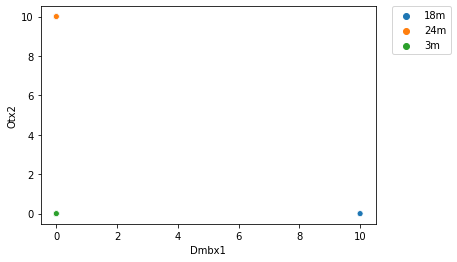

In [8]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Dmbx1', y='Otx2', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

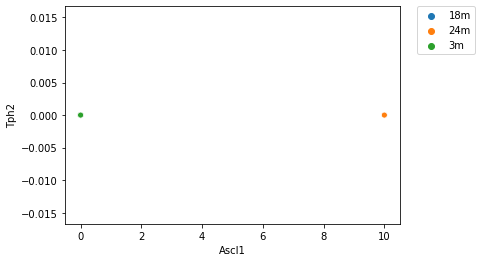

In [11]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Ascl1', y='Tph2', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

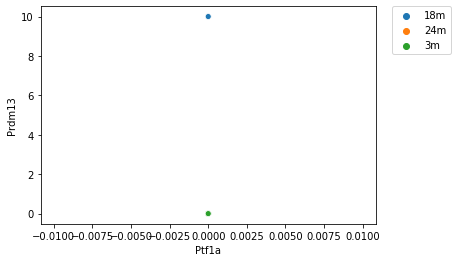

In [12]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Ptf1a', y='Prdm13', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

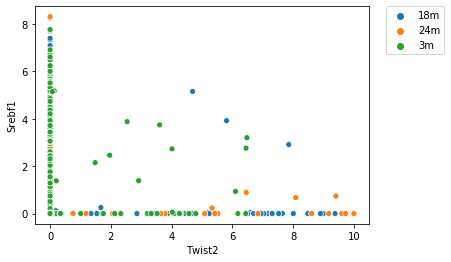

In [16]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Twist2', y='Srebf1', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Remove zero value genes - corr plot and more MI calculation - 7 Dec

In [19]:
gcmat.head()

index,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,age,celltype
18m,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.334001,...,0.00000,0.0,0.000000,0.0,0.04276,0.000000,0.000000,0.153797,18m,skeletal muscle satellite cell
18m,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,6.599676,0.0,0.00000,2.941003,0.000000,0.000000,18m,skeletal muscle satellite cell
18m,0.0,0.0,0.072408,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.046321,0.0,0.00000,2.052351,0.000000,0.000000,18m,skeletal muscle satellite cell
18m,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.000000,0.0,0.00000,0.140650,0.000000,0.000000,18m,skeletal muscle satellite cell
18m,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.20975,0.0,0.000000,0.0,0.00000,0.599470,0.053462,0.000000,18m,skeletal muscle satellite cell


In [67]:
gcmat.columns

Index(['0610005C13Rik', '0610007C21Rik', '0610007L01Rik', '0610007N19Rik',
       '0610007P08Rik', '0610007P14Rik', '0610007P22Rik', '0610008F07Rik',
       '0610009B14Rik', '0610009B22Rik',
       ...
       'Zxda', 'Zxdb', 'Zxdc', 'Zyg11a', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3',
       'age', 'celltype'],
      dtype='object', name='index', length=22968)

In [33]:
l=(gcmat[gcmat.index.values=='18m'].any())
m=(gcmat[gcmat.index.values=='24m'].any())
n=(gcmat[gcmat.index.values=='3m'].any())

In [95]:
mask1 = ((gcmat[gcmat.index.values=='18m']).iloc[:,0:22966] > 0).sum(0) >= 10
mask2 = ((gcmat[gcmat.index.values=='24m']).iloc[:,0:22966] > 0).sum(0) >= 10
mask3 = ((gcmat[gcmat.index.values=='3m']).iloc[:,0:22966] > 0).sum(0) >= 10

In [142]:
#df.astype(bool).sum(axis=0)


mask1 = ((gcmat[gcmat.index.values=='18m']).iloc[:,:]).astype(bool).sum(axis=0) >= 10
mask2 = ((gcmat[gcmat.index.values=='24m']).iloc[:,:]).astype(bool).sum(axis=0) >= 10
mask3 = ((gcmat[gcmat.index.values=='3m']).iloc[:,:]).astype(bool).sum(axis=0) >= 10

In [94]:
((gcmat[gcmat.index.values=='18m']).iloc[:,0:22966] > 0).sum(0)

index
0610005C13Rik     10
0610007C21Rik    678
0610007L01Rik    455
0610007N19Rik    150
0610007P08Rik     83
                ... 
Zyg11a             0
Zyg11b           148
Zyx              977
Zzef1            193
Zzz3             151
Length: 22966, dtype: int64

In [122]:
#(m[m].index)
mask1

index
0610005C13Rik     True
0610007C21Rik     True
0610007L01Rik     True
0610007N19Rik     True
0610007P08Rik     True
                 ...  
Zyg11a           False
Zyg11b            True
Zyx               True
Zzef1             True
Zzz3              True
Length: 22966, dtype: bool

In [25]:
l.where(l==False)

index
0610005C13Rik   NaN
0610007C21Rik   NaN
0610007L01Rik   NaN
0610007N19Rik   NaN
0610007P08Rik   NaN
                 ..
Zyx             NaN
Zzef1           NaN
Zzz3            NaN
age             NaN
celltype        NaN
Length: 22968, dtype: float64

In [34]:
mylist=(l[l].index)&(m[m].index)&(n[n].index)

In [107]:
mylist

Index(['0610007C21Rik', '0610007L01Rik', '0610007N19Rik', '0610007P08Rik',
       '0610007P14Rik', '0610007P22Rik', '0610009B22Rik', '0610009D07Rik',
       '0610009L18Rik', '0610009O20Rik',
       ...
       'Zwint', 'Zxda', 'Zxdb', 'Zxdc', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3',
       'age', 'celltype'],
      dtype='object', name='index', length=16101)

In [37]:
gcmatnew=gcmat.filter(items=mylist)

In [38]:
gcmatnew.shape

(3855, 16101)

In [39]:
gcmatnew.head()

index,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,age,celltype
18m,0.0,0.000000,0.0,0.0,0.0,0.0,0.334001,0.037076,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.04276,0.000000,0.000000,0.153797,18m,skeletal muscle satellite cell
18m,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,2.299186,0.0,0.0,...,0.000000,0.00000,0.0,6.599676,0.00000,2.941003,0.000000,0.000000,18m,skeletal muscle satellite cell
18m,0.0,0.072408,0.0,0.0,0.0,0.0,0.000000,2.137391,0.0,0.0,...,0.038261,0.00000,0.0,0.046321,0.00000,2.052351,0.000000,0.000000,18m,skeletal muscle satellite cell
18m,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.00000,0.140650,0.000000,0.000000,18m,skeletal muscle satellite cell
18m,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.20975,0.0,0.000000,0.00000,0.599470,0.053462,0.000000,18m,skeletal muscle satellite cell


In [143]:
mylist2=(mask1)&(mask2)&(mask3)

In [144]:
mylist2[mylist2].index

Index(['0610007C21Rik', '0610007L01Rik', '0610007N19Rik', '0610007P08Rik',
       '0610007P14Rik', '0610007P22Rik', '0610009B22Rik', '0610009D07Rik',
       '0610009L18Rik', '0610009O20Rik',
       ...
       'Zw10', 'Zwint', 'Zxda', 'Zxdc', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3',
       'age', 'celltype'],
      dtype='object', name='index', length=11301)

In [140]:
gcmatnew2=gcmat.filter(items=mylist2[mylist2].index)

In [133]:
gcmat.shape

(3855, 22968)

In [134]:
gcmatnew2.shape

(3855, 11299)

In [145]:
gcmatnew2.head()

index,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik,...,Zufsp,Zw10,Zwint,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,age,celltype
18m,0.0,0.000000,0.0,0.0,0.0,0.0,0.334001,0.037076,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.04276,0.000000,0.000000,0.153797,18m,skeletal muscle satellite cell
18m,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,2.299186,0.0,0.0,...,0.0,0.0,0.000000,6.599676,0.00000,2.941003,0.000000,0.000000,18m,skeletal muscle satellite cell
18m,0.0,0.072408,0.0,0.0,0.0,0.0,0.000000,2.137391,0.0,0.0,...,0.0,0.0,0.038261,0.046321,0.00000,2.052351,0.000000,0.000000,18m,skeletal muscle satellite cell
18m,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.140650,0.000000,0.000000,18m,skeletal muscle satellite cell
18m,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.599470,0.053462,0.000000,18m,skeletal muscle satellite cell


In [146]:
gcmatnew2.to_csv("nonzero_10cutoff_facscountmatrix8dec.csv")

In [41]:
gcmatnew.to_csv("nonzero_facscountmatrix7dec.csv")

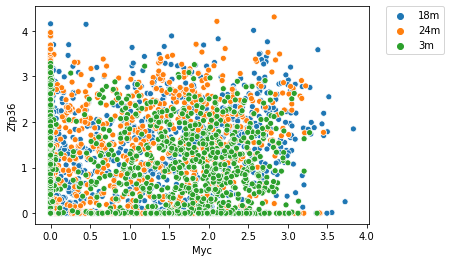

In [42]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Myc', y='Zfp36', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

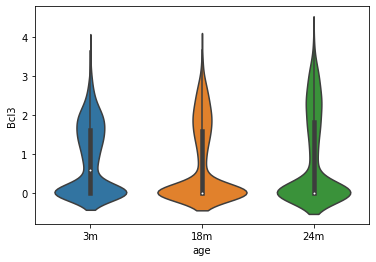

In [65]:
ax = sns.violinplot( data=gcmat, y=gcmat['Bcl3'],x='age',order=['3m','18m','24m'])

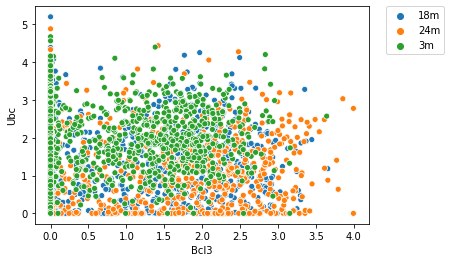

In [43]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Bcl3', y='Ubc', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

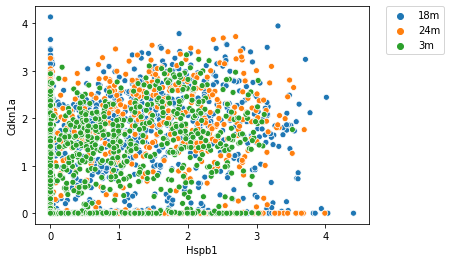

In [44]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Hspb1', y='Cdkn1a', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

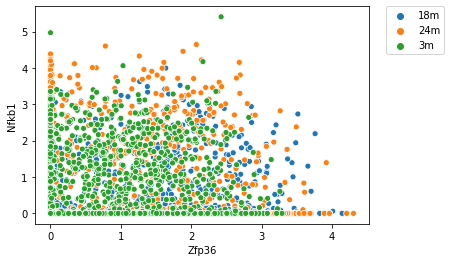

In [45]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Zfp36', y='Nfkb1', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

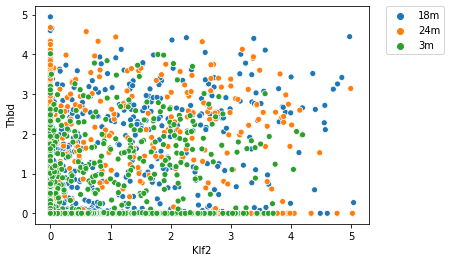

In [46]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Klf2', y='Thbd', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

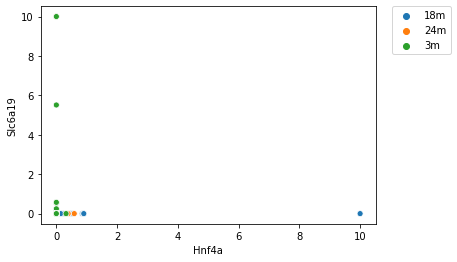

In [47]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Hnf4a', y='Slc6a19', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

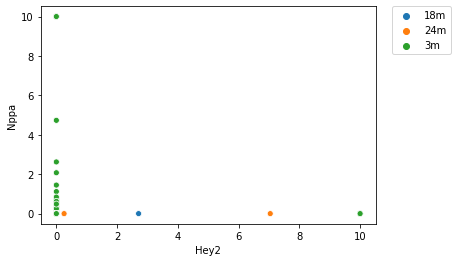

In [48]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Hey2', y='Nppa', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

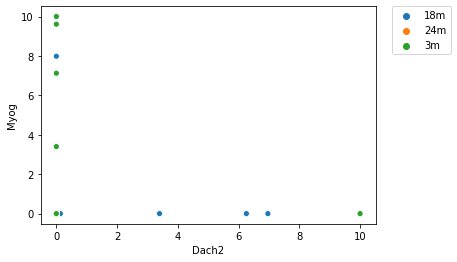

In [49]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Dach2', y='Myog', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

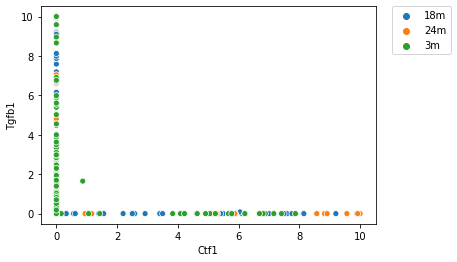

In [150]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Ctf1', y='Tgfb1', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
Pax6 and Wnt7b
Tbx4 and Shox2
Mzf1 and Sod3
Zbtb32 and Ciita
Ilf3 and Il2


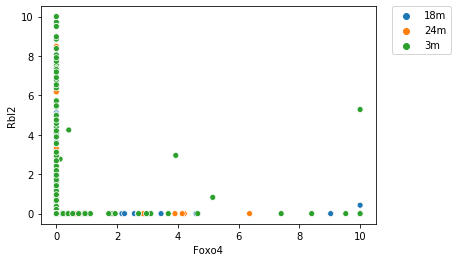

In [149]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Foxo4', y='Rbl2', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

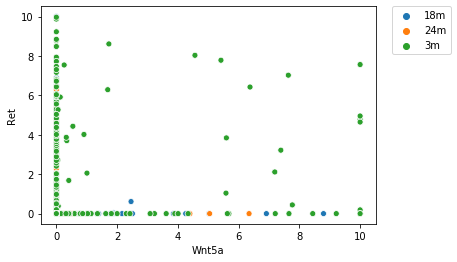

In [148]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Wnt5a', y='Ret', hue=gcmat.age.tolist())
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

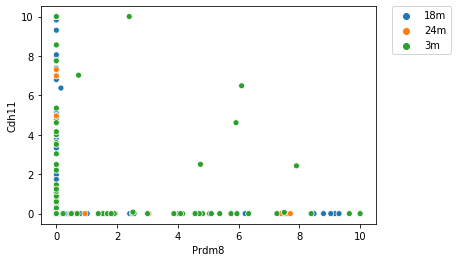

In [147]:
#sns.scatterplot(data=gcmat, x='Apex1', y='Nfkb1',style=gcmat.age.tolist(), hue = gcmat.celltype.tolist())
sns.scatterplot(data=gcmat, x='Prdm8', y='Cdh11', hue='age')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [2]:
sns.__version__

'0.11.0'

In [165]:
gcmat[gcmat['age']=='24m'].Prdm8

24m    0.0
24m    0.0
24m    0.0
24m    0.0
24m    0.0
      ... 
24m    0.0
24m    0.0
24m    0.0
24m    0.0
24m    0.0
Name: Prdm8, Length: 1232, dtype: float32

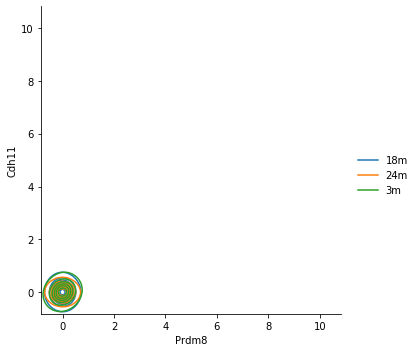

In [9]:
#sns.kdeplot(gcmat, x='Prdm8', y='Cdh11', hue=gcmat.age.tolist())

ax = sns.displot(gcmat, x='Prdm8', y='Cdh11', hue=gcmat.age.tolist(), kind="kde")
#ax = sns.displot(gcmat[gcmat['age']=='24m'].Myc, gcmat[gcmat['age']=='24m'].Zfp36,cmap="Blues", shade=True, shade_lowest=False)

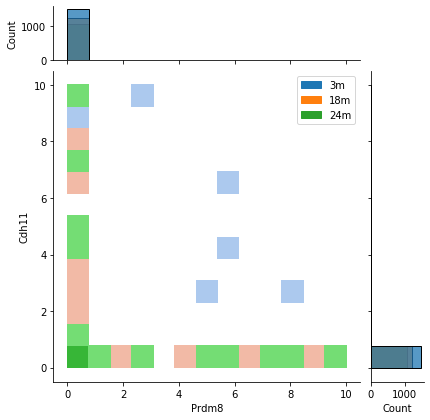

In [53]:
ax = sns.jointplot(data=gcmat, x='Prdm8', y='Cdh11', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],kind='hist',marginal_ticks=True)

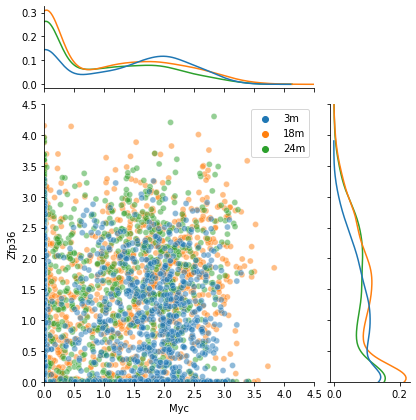

In [71]:
#ax = sns.jointplot(data=gcmat, x='Myc', y='Zfp36', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],kind='hist',marginal_kws=dict(shade=False,bins=50, kde=True))
g = sns.JointGrid(data=gcmat, x='Myc', y='Zfp36', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,4.5), ylim=(0,4.5),
                 marginal_ticks=True)
#g.plot(sns.histplot, sns.kdeplot)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=20)
g.plot_marginals(sns.kdeplot)

# 8 Dec plots preserved, compromised and increasing MI

In [ ]:
Ctf1 and Tgfb1
Apbb1 and Notch1
Elk1 and Tbp
Mtf1 and Slc39a10
Nfe2 and Tyms
Ctnnb1 and Wnt4
Runx3 and Thbs1
Msx1 and Tagln
Hoxa5 and Trp53
Cd7 and Nfkb1
Bhlhe40 and Il2ra


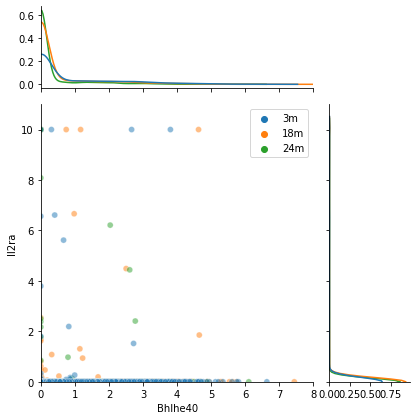

In [77]:
g = sns.JointGrid(data=gcmat, x='Bhlhe40', y='Il2ra', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                     xlim=(0,8), ylim=(0,11),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)
g.plot_marginals(sns.kdeplot)

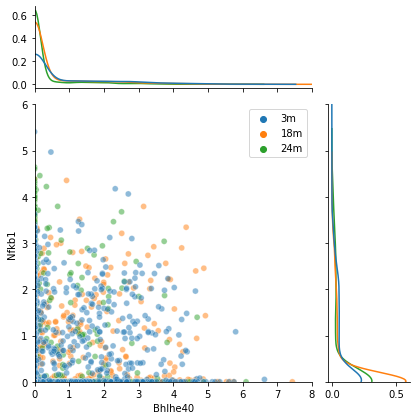

In [75]:
g = sns.JointGrid(data=gcmat, x='Bhlhe40', y='Nfkb1', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,8), ylim=(0,6),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

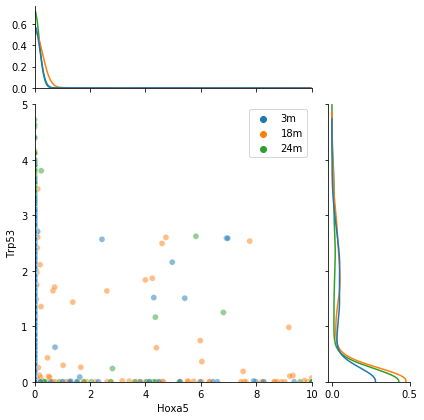

In [79]:
g = sns.JointGrid(data=gcmat, x='Hoxa5', y='Trp53', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,10), ylim=(0,5),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

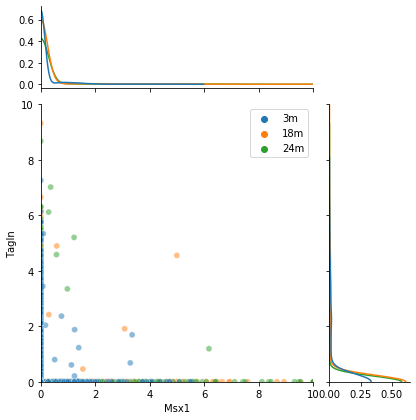

In [82]:
g = sns.JointGrid(data=gcmat, x='Msx1', y='Tagln', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,10), ylim=(0,10),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

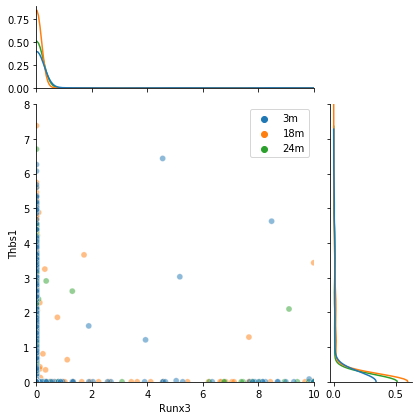

In [84]:
g = sns.JointGrid(data=gcmat, x='Runx3', y='Thbs1', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,10), ylim=(0,8),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

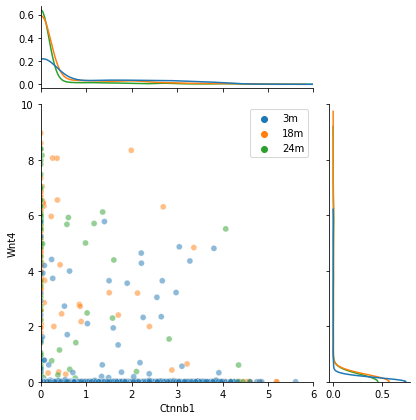

In [86]:
g = sns.JointGrid(data=gcmat, x='Ctnnb1', y='Wnt4', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,6), ylim=(0,10),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

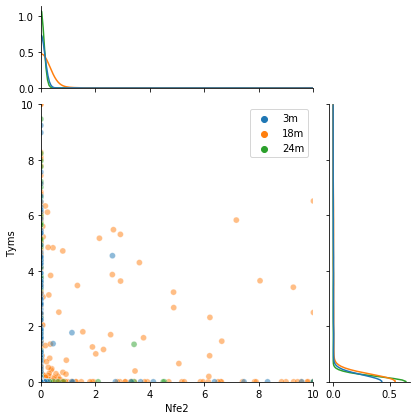

In [88]:
g = sns.JointGrid(data=gcmat, x='Nfe2', y='Tyms', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,10), ylim=(0,10),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

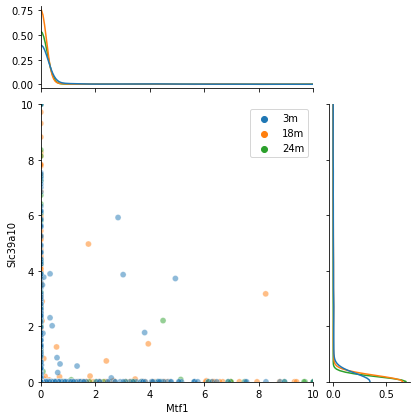

In [90]:
g = sns.JointGrid(data=gcmat, x='Mtf1', y='Slc39a10', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,10), ylim=(0,10),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

In [ ]:
Mapk1 and Egr1
Nfkb2 and Snd1
Fus and Sod2
Mdm2 and Trp53
Zhx3 and Zhx2
Khdrbs1 and Ece1
Egr2 and Zbtb16
Raf1 and Mapk1
Tardbp and Ran


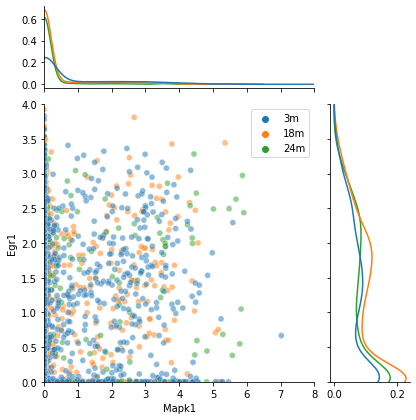

In [92]:
g = sns.JointGrid(data=gcmat, x='Mapk1', y='Egr1', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,8), ylim=(0,4),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

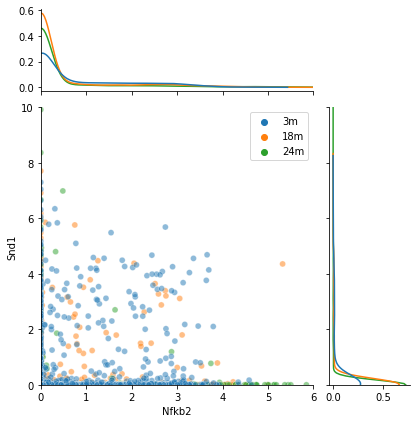

In [94]:
g = sns.JointGrid(data=gcmat, x='Nfkb2', y='Snd1', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,6), ylim=(0,10),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

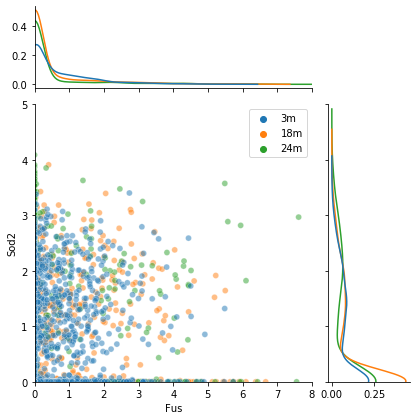

In [96]:
g = sns.JointGrid(data=gcmat, x='Fus', y='Sod2', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,8), ylim=(0,5),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

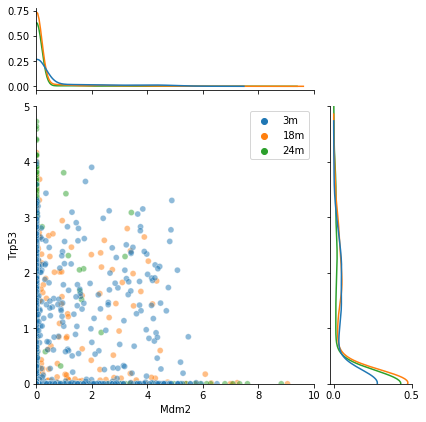

In [98]:
g = sns.JointGrid(data=gcmat, x='Mdm2', y='Trp53', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,10), ylim=(0,5),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

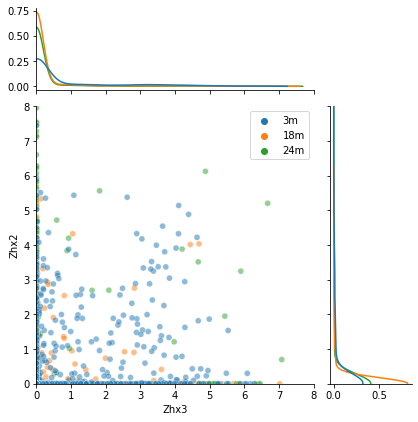

In [100]:
# Zhx3 and Zhx2
# Khdrbs1 and Ece1
# Egr2 and Zbtb16
# Raf1 and Mapk1
g = sns.JointGrid(data=gcmat, x='Zhx3', y='Zhx2', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,8), ylim=(0,8),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

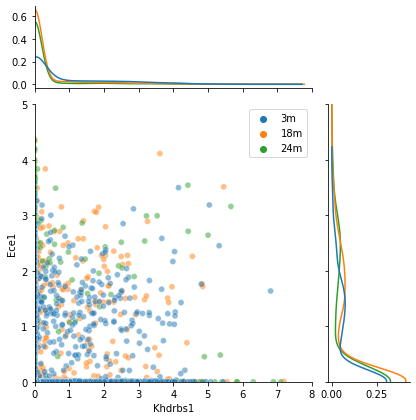

In [102]:
g = sns.JointGrid(data=gcmat, x='Khdrbs1', y='Ece1', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,8), ylim=(0,5),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

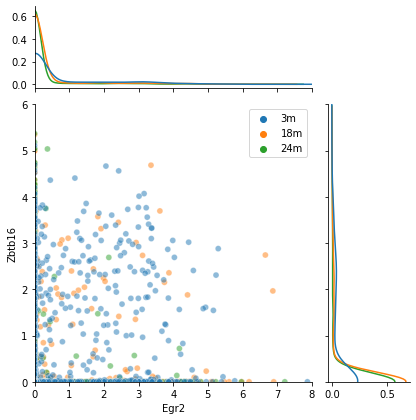

In [104]:
g = sns.JointGrid(data=gcmat, x='Egr2', y='Zbtb16', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,8), ylim=(0,6),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

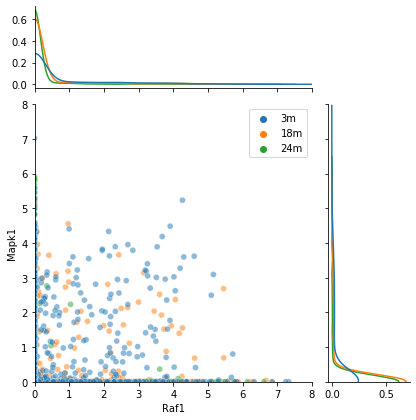

In [106]:
g = sns.JointGrid(data=gcmat, x='Raf1', y='Mapk1', hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                 height=6, ratio=3, 
                 xlim=(0,8), ylim=(0,8),
                 marginal_ticks=True)
g.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
g.plot_marginals(sns.kdeplot)

# Faby favor correlation yap vs sirt3, and piezo vs sirt3

In [138]:
gcmat.groupby(['celltype','age']).count()

index                               0610005C13Rik  0610007C21Rik  \
celltype                       age                                 
B cell                         18m             70             70   
                               24m             47             47   
                               3m              70             70   
T cell                         18m             37             37   
                               24m             61             61   
                               3m              38             38   
endothelial cell               18m            172            172   
                               24m            140            140   
                               3m             141            141   
macrophage                     18m            205            205   
                               24m             52             52   
                               3m              54             54   
mesenchymal stem cell          18m            354            354   
                               24m            317            317   
                               3m             264            264   
skeletal muscle satellite cell 18m            683            683   
                               24m            615            615   
                               3m             535            535   

index                               0610007L01Rik  0610007N19Rik  \
celltype                       age                                 
B cell                         18m             70             70   
                               24m             47             47   
                               3m              70             70   
T cell                         18m             37             37   
                               24m             61             61   
                               3m              38             38   
endothelial cell               18m            172            172   
                               24m            140            140   
                               3m             141            141   
macrophage                     18m            205            205   
                               24m             52             52   
                               3m              54             54   
mesenchymal stem cell          18m            354            354   
                               24m            317            317   
                               3m             264            264   
skeletal muscle satellite cell 18m            683            683   
                               24m            615            615   
                               3m             535            535   

index                               0610007P08Rik  0610007P14Rik  \
celltype                       age                                 
B cell                         18m             70             70   
                               24m             47             47   
                               3m              70             70   
T cell                         18m             37             37   
                               24m             61             61   
                               3m              38             38   
endothelial cell               18m            172            172   
                               24m            140            140   
                               3m             141            141   
macrophage                     18m            205            205   
                               24m             52             52   
                               3m              54             54   
mesenchymal stem cell          18m            354            354   
                               24m            317            317   
                               3m             264            264   
skeletal muscle satellite cell 18m            683            683   
                               24m            615     

In [177]:
gcmat.iloc[[0,1,2],16050:16070]

index,Pick1,Pid1,Pif1,Piga,Pigb,Pigc,Pigf,Pigg,Pigh,Pigk,Pigl,Pigm,Pign,Pigo,Pigp,Pigq,Pigr,Pigs,Pigt,Pigu
18m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.28454,0.000000,0.0,0.0,0.0,0.0,2.760325,0.153656,0.0,0.058331,0.00000,0.111943
18m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,2.239329,0.000000,0.0,0.000000,0.00000,0.000000
18m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.016161,0.0,0.0,0.0,0.0,3.340735,0.000000,0.0,0.180747,0.10465,0.000000


In [110]:
yapdf=gcmat[['Yap1','Sirt3','age','celltype']]

In [166]:
pdf=gcmat[['Piezo2','Sirt3','age','celltype']]

KeyError: "['Piezo2'] not in index"

In [117]:
yapdf.head()

index,Yap1,Sirt3,age,celltype
18m,0.000000,0.0,18m,skeletal muscle satellite cell
18m,5.659416,0.0,18m,skeletal muscle satellite cell
18m,0.000000,0.0,18m,skeletal muscle satellite cell
18m,2.556322,0.0,18m,skeletal muscle satellite cell
18m,0.000000,0.0,18m,skeletal muscle satellite cell


In [112]:
yapdf.corr(method ='pearson') 

index,Yap1,Sirt3
index,,
Yap1,1.000,-0.016
Sirt3,-0.016,1.000


In [119]:
yapdf.celltype.unique()

array(['skeletal muscle satellite cell', 'T cell',
       'mesenchymal stem cell', 'macrophage', 'endothelial cell',
       'B cell'], dtype=object)

In [142]:

column_names=['3m-MuSc','3m-Tcell','3m-MesenchymalSc','3m-Macrophage','3m-Endothelial','3m-Bcell','18m-MuSc','18m-Tcell','18m-MesenchymalSc','18m-Macrophage','18m-Endothelial','18m-Bcell','24m-MuSc','24m-Tcell','24m-MesenchymalSc','24m-Macrophage','24m-Endothelial','24m-Bcell']

newyap=pd.DataFrame(np.nan, index=range(0,683), columns=column_names,dtype='float')

In [143]:
newyap.head()

,3m-MuSc,3m-Tcell,3m-MesenchymalSc,3m-Macrophage,3m-Endothelial,3m-Bcell,18m-MuSc,18m-Tcell,18m-MesenchymalSc,18m-Macrophage,18m-Endothelial,18m-Bcell,24m-MuSc,24m-Tcell,24m-MesenchymalSc,24m-Macrophage,24m-Endothelial,24m-Bcell
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
df=yapdf

In [146]:
newyap['3m-MuSc']=list(df['Yap1'][(df['age']=='3m')&
                                (df['celltype']=='skeletal muscle satellite cell')])
newyap['3m-Tcell']=list(df['Yap1'][(df['age']=='3m')&
                                (df['celltype']=='T cell')])

ValueError: Length of values (535) does not match length of index (683)

In [150]:
list(df['Yap1'][(df['age']=='3m')&(df['celltype']=='skeletal muscle satellite cell')])

[0.0,
 0.0,
 0.0,
 2.538947582244873,
 1.125847339630127,
 0.7104206085205078,
 0.0,
 0.0,
 0.15604065358638763,
 0.0,
 1.0970155000686646,
 0.0,
 0.0,
 7.191672325134277,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0367192029953003,
 0.0,
 0.0,
 0.0,
 0.7043431997299194,
 1.8650926351547241,
 0.0,
 1.4993482828140259,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.036203861236572,
 0.0,
 5.94941520690918,
 0.0,
 0.0,
 4.754999160766602,
 0.0,
 4.532199382781982,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.063180923461914,
 0.0,
 3.6320416927337646,
 1.4119478464126587,
 0.0,
 0.0,
 3.7690794467926025,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.322678565979004,
 0.0,
 0.0,
 1.5594710111618042,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.146552085876465,
 0.0,
 0.0,
 0.0,
 3.269069194793701,
 5.072143077850342,
 0.0,
 0.0,
 0.0,
 0.0,
 3.1863412857055664,
 0.0,
 0.0,
 0.0,
 0.022335994988679886,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.6632953882217407,
 0

In [160]:
newyap=[]
#3m-MuSc=list(df['Yap1'][(df['age']=='3m')&(df['celltype']=='skeletal muscle satellite cell')])
newyap.append(list(df['Yap1'][(df['age']=='3m')&(df['celltype']=='skeletal muscle satellite cell')]))
newyap.append(list(df['Yap1'][(df['age']=='3m')&(df['celltype']=='T cell')]))
newyap.append(list(df['Yap1'][(df['age']=='3m')&(df['celltype']=='mesenchymal stem cell')]))
newyap.append(list(df['Yap1'][(df['age']=='3m')&
                                (df['celltype']=='macrophage')]))
newyap.append(list(df['Yap1'][(df['age']=='3m')&
                                (df['celltype']=='endothelial cell')]))
newyap.append(list(df['Yap1'][(df['age']=='3m')&
                                (df['celltype']=='B cell')]))
newyap.append(list(df['Yap1'][(df['age']=='18m')&
                                (df['celltype']=='skeletal muscle satellite cell')]))
newyap.append(list(df['Yap1'][(df['age']=='18m')&
                                (df['celltype']=='T cell')]))
newyap.append(list(df['Yap1'][(df['age']=='18m')&
                                (df['celltype']=='mesenchymal stem cell')]))
newyap.append(list(df['Yap1'][(df['age']=='18m')&
                                (df['celltype']=='macrophage')]))
newyap.append(list(df['Yap1'][(df['age']=='18m')&
                                (df['celltype']=='endothelial cell')]))
newyap.append(list(df['Yap1'][(df['age']=='18m')&
                                (df['celltype']=='B cell')]))
newyap.append(list(df['Yap1'][(df['age']=='24m')&
                                (df['celltype']=='skeletal muscle satellite cell')]))
newyap.append(list(df['Yap1'][(df['age']=='24m')&
                                (df['celltype']=='T cell')]))
newyap.append(list(df['Yap1'][(df['age']=='24m')&
                                (df['celltype']=='mesenchymal stem cell')]))
newyap.append(list(df['Yap1'][(df['age']=='24m')&
                                (df['celltype']=='macrophage')]))
newyap.append(list(df['Yap1'][(df['age']=='24m')&
                                (df['celltype']=='endothelial cell')]))
newyap.append(list(df['Yap1'][(df['age']=='24m')&
                                (df['celltype']=='B cell')]))


        

In [161]:
import itertools


In [162]:
newyapdf=pd.DataFrame((_ for _ in itertools.zip_longest(*newyap)), columns=column_names)


In [164]:
newyapdf.tail()

,3m-MuSc,3m-Tcell,3m-MesenchymalSc,3m-Macrophage,3m-Endothelial,3m-Bcell,18m-MuSc,18m-Tcell,18m-MesenchymalSc,18m-Macrophage,18m-Endothelial,18m-Bcell,24m-MuSc,24m-Tcell,24m-MesenchymalSc,24m-Macrophage,24m-Endothelial,24m-Bcell
678,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
679,NaN,NaN,NaN,NaN,NaN,NaN,0.055751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
682,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
newp=[]
#3m-MuSc=list(df['Yap1'][(df['age']=='3m')&(df['celltype']=='skeletal muscle satellite cell')])
newp.append(list(df['Sirt3'][(df['age']=='3m')&(df['celltype']=='skeletal muscle satellite cell')]))
newp.append(list(df['Sirt3'][(df['age']=='3m')&(df['celltype']=='T cell')]))
newp.append(list(df['Sirt3'][(df['age']=='3m')&(df['celltype']=='mesenchymal stem cell')]))
newp.append(list(df['Sirt3'][(df['age']=='3m')&
                                (df['celltype']=='macrophage')]))
newp.append(list(df['Sirt3'][(df['age']=='3m')&
                                (df['celltype']=='endothelial cell')]))
newp.append(list(df['Sirt3'][(df['age']=='3m')&
                                (df['celltype']=='B cell')]))
newp.append(list(df['Sirt3'][(df['age']=='18m')&
                                (df['celltype']=='skeletal muscle satellite cell')]))
newp.append(list(df['Sirt3'][(df['age']=='18m')&
                                (df['celltype']=='T cell')]))
newp.append(list(df['Sirt3'][(df['age']=='18m')&
                                (df['celltype']=='mesenchymal stem cell')]))
newp.append(list(df['Sirt3'][(df['age']=='18m')&
                                (df['celltype']=='macrophage')]))
newp.append(list(df['Sirt3'][(df['age']=='18m')&
                                (df['celltype']=='endothelial cell')]))
newp.append(list(df['Sirt3'][(df['age']=='18m')&
                                (df['celltype']=='B cell')]))
newp.append(list(df['Sirt3'][(df['age']=='24m')&
                                (df['celltype']=='skeletal muscle satellite cell')]))
newp.append(list(df['Sirt3'][(df['age']=='24m')&
                                (df['celltype']=='T cell')]))
newp.append(list(df['Sirt3'][(df['age']=='24m')&
                                (df['celltype']=='mesenchymal stem cell')]))
newp.append(list(df['Sirt3'][(df['age']=='24m')&
                                (df['celltype']=='macrophage')]))
newp.append(list(df['Sirt3'][(df['age']=='24m')&
                                (df['celltype']=='endothelial cell')]))
newp.append(list(df['Sirt3'][(df['age']=='24m')&
                                (df['celltype']=='B cell')]))


In [179]:
newpdf=pd.DataFrame((_ for _ in itertools.zip_longest(*newp)), columns=column_names)

In [181]:
newpdf.corrwith(newyapdf,method='pearson')

3m-MuSc             -0.005579
3m-Tcell            -0.027027
3m-MesenchymalSc     0.051283
3m-Macrophage             NaN
3m-Endothelial       0.052931
3m-Bcell            -0.019701
18m-MuSc            -0.025439
18m-Tcell                 NaN
18m-MesenchymalSc   -0.026660
18m-Macrophage      -0.028336
18m-Endothelial     -0.028224
18m-Bcell                 NaN
24m-MuSc            -0.014463
24m-Tcell            0.014786
24m-MesenchymalSc   -0.046087
24m-Macrophage      -0.030291
24m-Endothelial      0.021196
24m-Bcell           -0.027253
dtype: float64

In [132]:
newyap['3m-MuSc']=list(df['Yap1'][(df['age']=='3m')&
                                (df['celltype']=='skeletal muscle satellite cell')])
newyap['3m-Tcell']=list(df['Yap1'][(df['age']=='3m')&
                                (df['celltype']=='T cell')])
newyap['3m-MesenchymalSc']=df['Yap1'][(df['age']=='3m')&
                                (df['celltype']=='mesenchymal stem cell')]
newyap['3m-Macrophage']=df['Yap1'][(df['age']=='3m')&
                                (df['celltype']=='macrophage')]
newyap['3m-Endothelial']=df['Yap1'][(df['age']=='3m')&
                                (df['celltype']=='endothelial cell')]
newyap['3m-Bcell']=df['Yap1'][(df['age']=='3m')&
                                (df['celltype']=='B cell')]

newyap['18m-MuSc']=df['Yap1'][(df['age']=='18m')&
                                (df['celltype']=='skeletal muscle satellite cell')]
newyap['18m-Tcell']=df['Yap1'][(df['age']=='18m')&
                                (df['celltype']=='T cell')]
newyap['18m-MesenchymalSc']=df['Yap1'][(df['age']=='18m')&
                                (df['celltype']=='mesenchymal stem cell')]
newyap['18m-Macrophage']=df['Yap1'][(df['age']=='18m')&
                                (df['celltype']=='macrophage')]
newyap['18m-Endothelial']=df['Yap1'][(df['age']=='18m')&
                                (df['celltype']=='endothelial cell')]
newyap['18m-Bcell']=df['Yap1'][(df['age']=='18m')&
                                (df['celltype']=='B cell')]

newyap['24m-MuSc']=df['Yap1'][(df['age']=='24m')&
                                (df['celltype']=='skeletal muscle satellite cell')]
newyap['24m-Tcell']=df['Yap1'][(df['age']=='24m')&
                                (df['celltype']=='T cell')]
newyap['24m-MesenchymalSc']=df['Yap1'][(df['age']=='24m')&
                                (df['celltype']=='mesenchymal stem cell')]
newyap['24m-Macrophage']=df['Yap1'][(df['age']=='24m')&
                                (df['celltype']=='macrophage')]
newyap['24m-Endothelial']=df['Yap1'][(df['age']=='24m')&
                                (df['celltype']=='endothelial cell')]
newyap['24m-Bcell']=df['Yap1'][(df['age']=='24m')&
                                (df['celltype']=='B cell')]

ValueError: cannot reindex from a duplicate axis

In [ ]:
index=range(0,4)

In [139]:
df=pd.DataFrame({'a':[1,2,3, np.nan ],
                'b':[3,4, np.nan, np.nan],
                'c':[5,6,7,8]})

In [140]:
df2=pd.DataFrame({'a':[7,2,3, np.nan ],
                'b':[3,7, np.nan, np.nan],
                'c':[9,6,7,8]})

In [141]:
df.corrwith(df2)

a   -0.755929
b    1.000000
c   -0.200000
dtype: float64

# Dec 9 -MI ranking - TG genes selected

In [187]:
df=pd.read_csv("ranked_normMI_cutoffallcells8Dec.csv", index_col=0)

In [188]:
df.head()

,3m,18m,24m,3m-24m,24m-3m
Nfkbiz and Nfkbiz,1.000000,1.000000,1.000000,0.000000,0.000000
Klf16 and Klf16,1.000000,1.000000,1.000000,0.000000,0.000000
Myc and Zfp36,0.845087,0.831749,0.752120,0.092966,-0.092966
Bcl3 and Ubc,0.798420,0.727344,0.659040,0.139380,-0.139380
Hspb1 and Cdkn1a,0.779754,0.778393,0.601155,0.178599,-0.178599


In [204]:
presdf=df[(df['24m']>0.3)&(df['3m']>0.3)&(df['3m-24m']<0.2)]

In [205]:
presdf.shape

(14, 5)

In [206]:
presdf

,3m,18m,24m,3m-24m,24m-3m
Nfkbiz and Nfkbiz,1.000000,1.000000,1.000000,0.000000,0.000000
Klf16 and Klf16,1.000000,1.000000,1.000000,0.000000,0.000000
Myc and Zfp36,0.845087,0.831749,0.752120,0.092966,-0.092966
Bcl3 and Ubc,0.798420,0.727344,0.659040,0.139380,-0.139380
Hspb1 and Cdkn1a,0.779754,0.778393,0.601155,0.178599,-0.178599
Zfp36 and Nfkb1,0.777944,0.626345,0.584133,0.193811,-0.193811
Klf2 and Thbd,0.612610,0.685820,0.518425,0.094185,-0.094185
Arid5b and Sox9,0.538626,0.479377,0.376106,0.162521,-0.162521
Nfic and Pdgfra,0.513601,0.425267,0.367922,0.145680,-0.145680
Pttg1 and Pttg1ip,0.515266,0.523394,0.349325,0.165942,-0.165942


In [207]:
presdf.index.values

array(['Nfkbiz and Nfkbiz', 'Klf16 and Klf16', 'Myc and Zfp36',
       'Bcl3 and Ubc', 'Hspb1 and Cdkn1a', 'Zfp36 and Nfkb1',
       'Klf2 and Thbd', 'Arid5b and Sox9', 'Nfic and Pdgfra',
       'Pttg1 and Pttg1ip', 'Cebpg and Il6', 'Fosl1 and Thbs2',
       'Rala and Fos', 'Nfil3 and Ptgs2'], dtype=object)

In [211]:
text=presdf.index.values
preslist=[]
for i in range(2,len(text)):
    preslist.append(text[i].split('and ')[1])

In [212]:
preslist

['Zfp36',
 'Ubc',
 'Cdkn1a',
 'Nfkb1',
 'Thbd',
 'Sox9',
 'Pdgfra',
 'Pttg1ip',
 'Il6',
 'Thbs2',
 'Fos',
 'Ptgs2']

In [214]:
(df).sort_values(by=['3m-24m'], ascending=False,inplace=True)

In [225]:
compdf=df[(df['24m']<0.3)&(df['3m']>0.3)&(df['3m-24m']>0.2)]

In [229]:
compdf.head(12)

,3m,18m,24m,3m-24m,24m-3m
Mapk1 and Egr1,0.652080,0.499113,0.199837,0.452243,-0.452243
Nfkb2 and Snd1,0.556202,0.357801,0.123713,0.432489,-0.432489
Mdm2 and Trp53,0.485078,0.318722,0.092130,0.392948,-0.392948
Zhx3 and Zhx2,0.509333,0.233551,0.141554,0.367779,-0.367779
Khdrbs1 and Ece1,0.570268,0.482984,0.205203,0.365065,-0.365065
Egr2 and Zbtb16,0.530509,0.289873,0.166157,0.364353,-0.364353
Raf1 and Mapk1,0.470959,0.393750,0.111046,0.359913,-0.359913
Tardbp and Ran,0.584952,0.481792,0.226602,0.358350,-0.358350
Crebbp and Trp53,0.545809,0.338694,0.196318,0.349491,-0.349491
Tob1 and Ccnd1,0.394402,0.320653,0.061973,0.332429,-0.332429


In [233]:
text2=(df.index.values[0:13])
complist=[]
for i in range(0,len(text2)):
    complist.append(text2[i].split('and ')[1])

In [234]:
complist

['Egr1',
 'Snd1',
 'Sod2',
 'Trp53',
 'Zhx2',
 'Ece1',
 'Zbtb16',
 'Mapk1',
 'Ran',
 'Trp53',
 'Ccnd1',
 'Trp53',
 'Mt1']

In [235]:
(df).sort_values(by=['24m-3m'], ascending=False,inplace=True)

In [236]:
df.head(15)

,3m,18m,24m,3m-24m,24m-3m
Bcl11b and Zbtb7b,0.083152,0.002548,0.150975,-0.067823,0.067823
Pbx1 and Cdkn2b,0.021639,0.030319,0.070018,-0.048379,0.048379
Twist2 and Srebf1,0.092172,0.081135,0.126384,-0.034211,0.034211
Id1 and Tnf,0.090653,0.052854,0.116720,-0.026067,0.026067
Htatip2 and Wisp2,0.126256,0.160140,0.147282,-0.021026,0.021026
Snd1 and E2f1,0.087111,0.219173,0.103000,-0.015889,0.015889
Sox6 and Trp53,0.053449,0.054060,0.060549,-0.007100,0.007100
E2f2 and Mcm5,0.119013,0.145015,0.124004,-0.004990,0.004990
Gzf1 and Hoxa10,0.086444,0.181051,0.088954,-0.002511,0.002511
Nfkbiz and Nfkbiz,1.000000,1.000000,1.000000,0.000000,0.000000


In [237]:
incdf=(df[df['24m-3m']>0])

In [238]:
text3=(incdf.index.values[0:13])
inclist=[]
for i in range(0,len(text3)):
    inclist.append(text3[i].split('and ')[1])

In [239]:
inclist

['Zbtb7b',
 'Cdkn2b',
 'Srebf1',
 'Tnf',
 'Wisp2',
 'E2f1',
 'Trp53',
 'Mcm5',
 'Hoxa10']

In [240]:
text

array(['Nfkbiz and Nfkbiz', 'Klf16 and Klf16', 'Myc and Zfp36',
       'Bcl3 and Ubc', 'Hspb1 and Cdkn1a', 'Zfp36 and Nfkb1',
       'Klf2 and Thbd', 'Arid5b and Sox9', 'Nfic and Pdgfra',
       'Pttg1 and Pttg1ip', 'Cebpg and Il6', 'Fosl1 and Thbs2',
       'Rala and Fos', 'Nfil3 and Ptgs2'], dtype=object)

In [241]:
text2

array(['Mapk1 and Egr1', 'Nfkb2 and Snd1', 'Fus and Sod2',
       'Mdm2 and Trp53', 'Zhx3 and Zhx2', 'Khdrbs1 and Ece1',
       'Egr2 and Zbtb16', 'Raf1 and Mapk1', 'Tardbp and Ran',
       'Crebbp and Trp53', 'Tob1 and Ccnd1', 'Bach1 and Trp53',
       'Nf1 and Mt1'], dtype=object)

In [242]:
text3

array(['Bcl11b and Zbtb7b', 'Pbx1 and Cdkn2b', 'Twist2 and Srebf1',
       'Id1 and Tnf', 'Htatip2 and Wisp2', 'Snd1 and E2f1',
       'Sox6 and Trp53', 'E2f2 and Mcm5', 'Gzf1 and Hoxa10'], dtype=object)

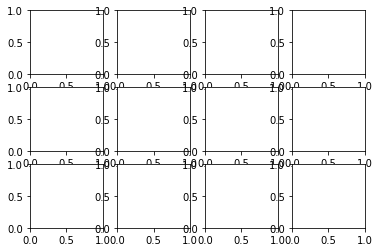

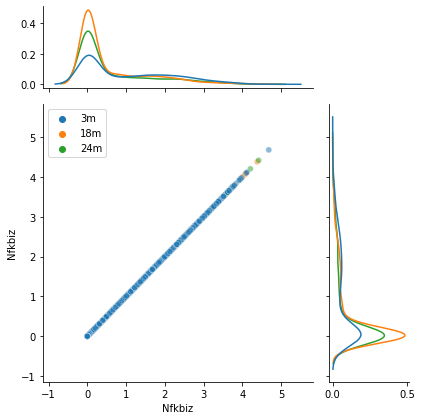

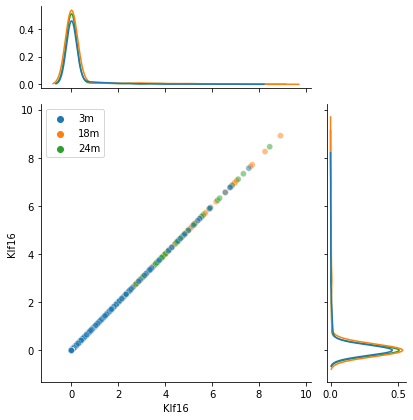

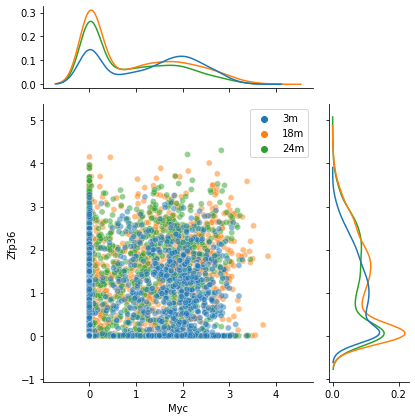

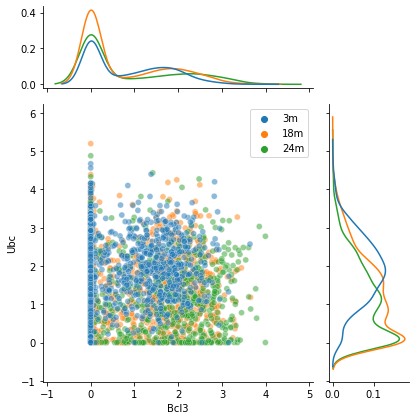

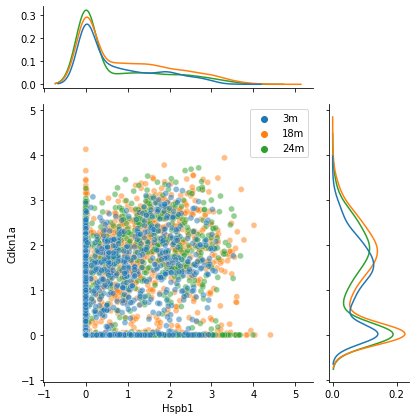

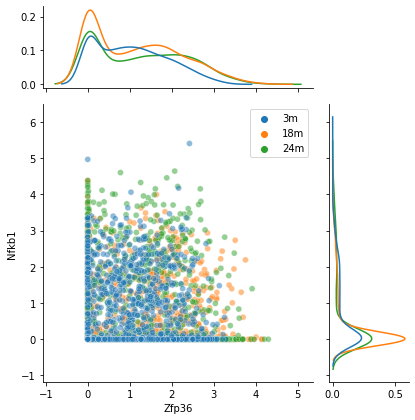

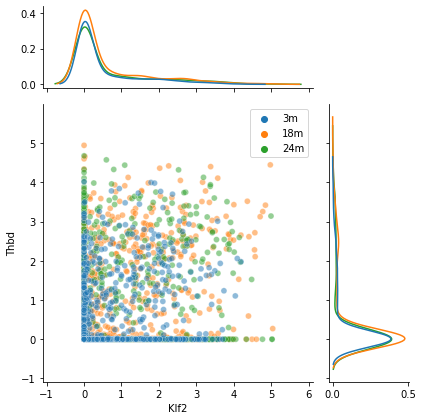

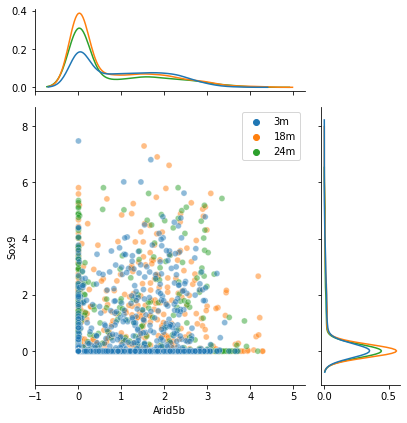

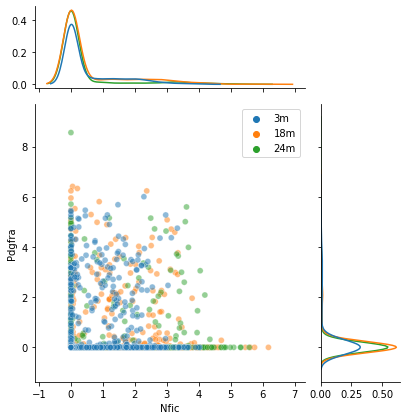

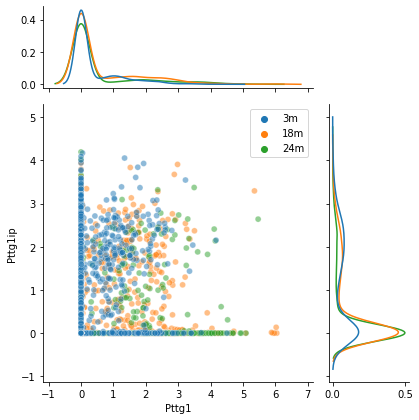

In [245]:
fig, axes = plt.subplots(ncols=4, nrows=3)

for i, ax in zip(range(10), axes.flat):
    ax = sns.JointGrid(data=gcmat, x=text[i].split(' and ')[0], y=text[i].split(' and ')[1], 
                      hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                      height=6, ratio=3, 
                      #xlim=(0,8), ylim=(0,5),
                      marginal_ticks=True)
    ax.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
    ax.plot_marginals(sns.kdeplot)

    #sns.distplot(data[i,0,0,0], hist=False, ax=ax)
plt.show()

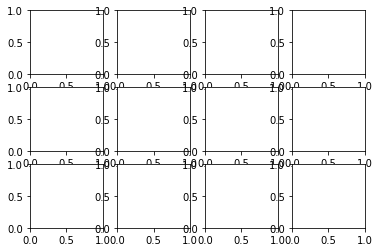

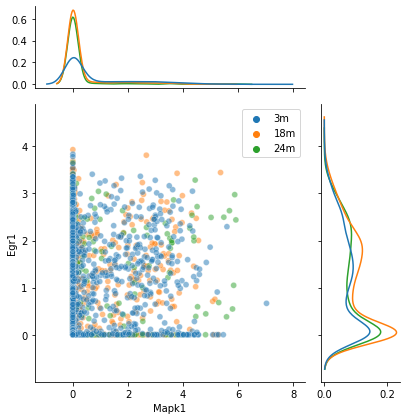

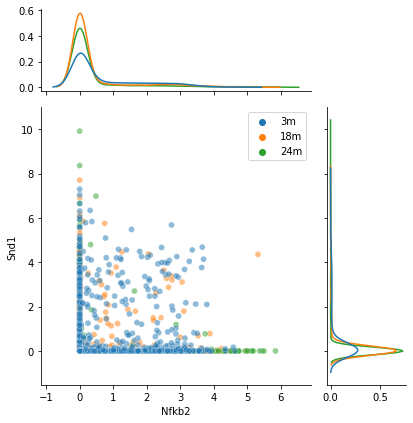

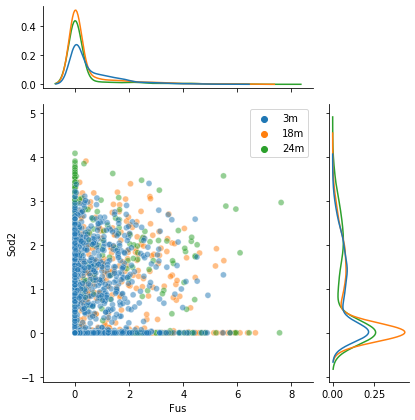

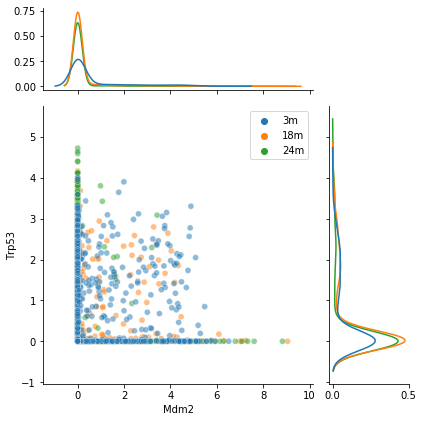

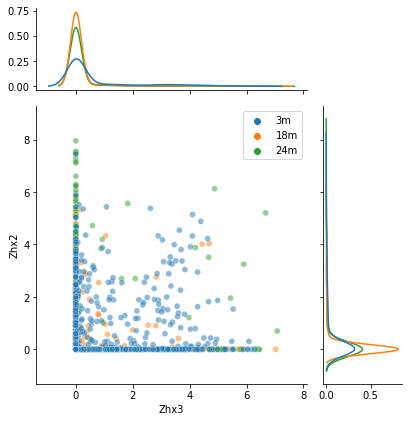

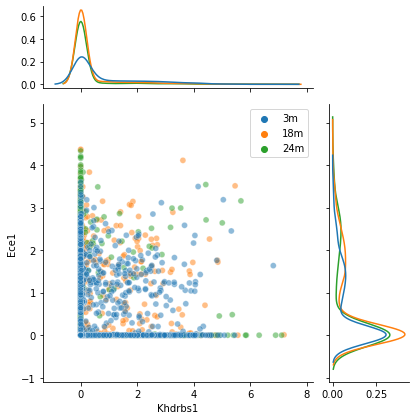

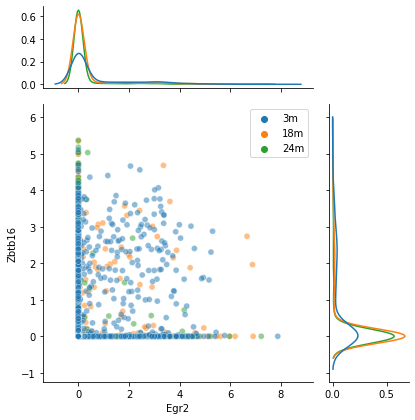

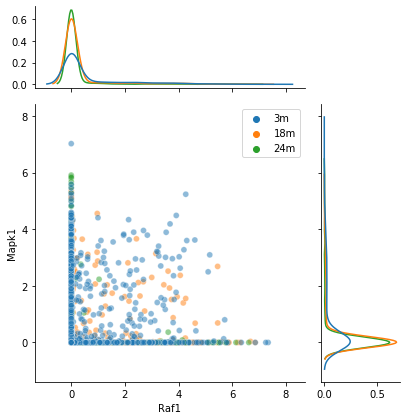

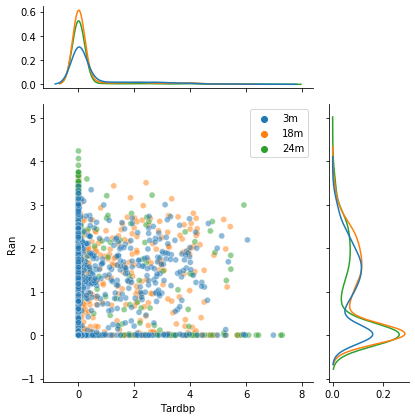

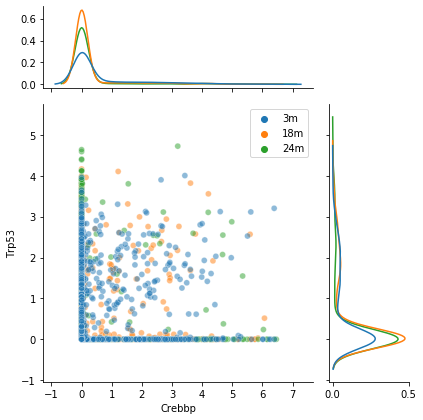

In [246]:
fig, axes = plt.subplots(ncols=4, nrows=3)

for i, ax in zip(range(10), axes.flat):
    ax = sns.JointGrid(data=gcmat, x=text2[i].split(' and ')[0], y=text2[i].split(' and ')[1], 
                      hue=gcmat.age.tolist(),hue_order=['3m','18m','24m'],
                      height=6, ratio=3, 
                      #xlim=(0,8), ylim=(0,5),
                      marginal_ticks=True)
    ax.plot_joint(sns.scatterplot,  alpha=.5)#, bins=50)
    ax.plot_marginals(sns.kdeplot)

    #sns.distplot(data[i,0,0,0], hist=False, ax=ax)
plt.show()